In [ ]:
#M2 SHAM

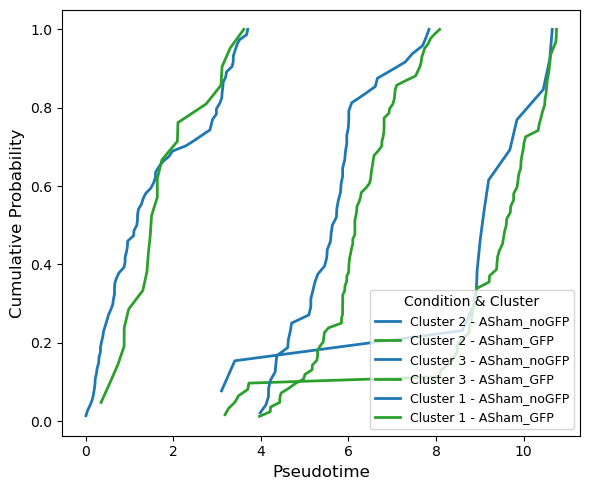

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ---------- ECDF Function ----------
def ECDF_standard(data: np.array, ax=None, **kwargs):
    """Compute and plot the empirical cumulative distribution function (ECDF).

    Args:
        data (np.array): 1D array of numerical values.
        ax (matplotlib.axes._axes.Axes, optional): Axis to plot on. Defaults to None.
        **kwargs: Additional plotting arguments (e.g., color, label, linestyle).

    Returns:
        x (np.array): Sorted data.
        y (np.array): ECDF values (proportion of samples ≤ x).
    """
    x = np.sort(data)
    y = np.arange(1, len(x)+1) / len(x)

    if ax is None:
        plt.plot(x, y, **kwargs)
    else:
        ax.plot(x, y, **kwargs)

    return x, y

# ---------- Main Plotting Code ----------
# Set working directory
os.chdir("P:/Tolulope/Manuscript/Yuan Analysis")

# Load pseudotime metadata
df = pd.read_csv("pseudotime_metadata_for_python.csv", index_col=0)

# Initialize plot
plt.figure(figsize=(6, 5))

# Define samples, colors, linestyles, and clusters
samples = ["ASham_noGFP", "ASham_GFP"]
clusters = df["Cluster"].unique()  # Use the 'Cluster' column from your Slingshot results
colors = ["#1f77b4", "#2ca02c"]
linestyles = ["-", "-"]
linewidths = [2, 2]

# Plot ECDF for each cluster and condition combination
for cluster in clusters:
    for sample, color, linestyle, linewidth in zip(samples, colors, linestyles, linewidths):
        cluster_data = df[(df["Cluster"] == cluster) & (df["Sample"] == sample)]["Pseudotime"].dropna().values
        ECDF_standard(cluster_data, color=color, linestyle=linestyle, linewidth=linewidth, label=f"Cluster {cluster} - {sample}")

# Customize plot
plt.xlabel("Pseudotime", fontsize=12)
plt.ylabel("Cumulative Probability", fontsize=12)
plt.legend(title="Condition & Cluster", title_fontsize=10, fontsize=9, loc="best")
plt.tight_layout()

# Save and show plot
plt.savefig("ECDF_PseudotimeClusterRoot.png", dpi=300)
plt.show()


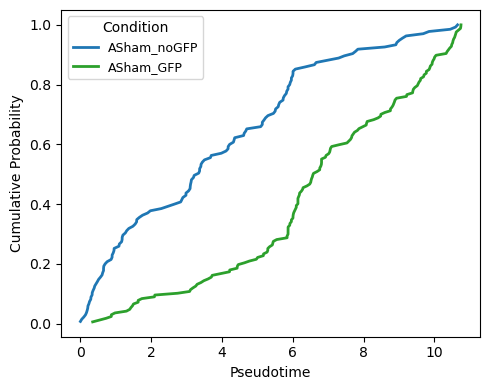

In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ---------- ECDF Function ----------
def ECDF_standard(data: np.array, ax=None, **kwargs):
    """Compute and plot the empirical cumulative distribution function (ECDF).

    Args:
        data (np.array): 1D array of numerical values.
        ax (matplotlib.axes._axes.Axes, optional): Axis to plot on. Defaults to None.
        **kwargs: Additional plotting arguments (e.g., color, label, linestyle).

    Returns:
        x (np.array): Sorted data.
        y (np.array): ECDF values (proportion of samples ≤ x).
    """
    x = np.sort(data)
    y = np.arange(1, len(x)+1) / len(x)

    if ax is None:
        plt.plot(x, y, **kwargs)
    else:
        ax.plot(x, y, **kwargs)

    return x, y

# ---------- Main Plotting Code ----------
# Set working directory
os.chdir("P:/Tolulope/Manuscript/Yuan Analysis")

# Load pseudotime metadata
df = pd.read_csv("pseudotime_metadata_for_python.csv", index_col=0)

# Initialize plot
plt.figure(figsize=(5, 4))

# Define samples and plotting styles
samples = ["ASham_noGFP", "ASham_GFP"]
colors = ["#1f77b4", "#2ca02c"]
linestyles = ["-", "-"]
linewidths = [2, 2]

# Plot ECDF for each sample
for sample, color, linestyle, linewidth in zip(samples, colors, linestyles, linewidths):
    data = df[df["Sample"] == sample]["Pseudotime"].dropna().values
    ECDF_standard(data, color=color, linestyle=linestyle, linewidth=linewidth, label=sample)

# Customize plot
plt.xlabel("Pseudotime", fontsize=10)
plt.ylabel("Cumulative Probability", fontsize=10)
plt.legend(title="Condition", title_fontsize=10, fontsize=9, loc="best")
plt.tight_layout()

# Save and show plot
plt.savefig("ECDF_Pseudotime.png", dpi=300)
plt.show()


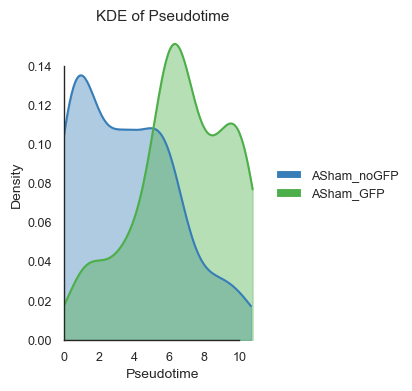

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import gaussian_kde
import seaborn as sns
from matplotlib.patches import Patch

# Load data
df = pd.read_csv("pseudotime_metadata_for_python.csv", index_col=0)

# Set base style and smaller font scale
sns.set(style="white", context="paper")  # context='paper' is smaller than 'talk'

# Initialize plot
fig, ax = plt.subplots(figsize=(5, 4))

# Define colors
colors = {"ASham_noGFP": "#377eb8", "ASham_GFP": "#4daf4a"}

# Plot KDEs
for sample in ["ASham_noGFP", "ASham_GFP"]:
    data = df[df["Sample"] == sample]["Pseudotime"].dropna()
    kde = gaussian_kde(data)
    x_grid = np.linspace(0, data.max(), 200)
    ax.fill_between(x_grid, kde(x_grid), alpha=0.4, color=colors[sample])
    ax.plot(x_grid, kde(x_grid), color=colors[sample], linewidth=1.5)
    

# Axis settings
ax.set_xlim(left=0)
ax.set_ylim(bottom=0)

# Labels and title with smaller font sizes
ax.set_xlabel("Pseudotime", fontsize=10)
ax.set_ylabel("Density", fontsize=10)
ax.set_title("KDE of Pseudotime", fontsize=11)

# Smaller ticks
ax.tick_params(axis='both', labelsize=9)

# Legend with smaller font and no border on patches
legend_elements = [
    Patch(facecolor=colors["ASham_noGFP"], label="ASham_noGFP"),
    Patch(facecolor=colors["ASham_GFP"], label="ASham_GFP")
]
ax.legend(
    handles=legend_elements,
    loc="center left",
    bbox_to_anchor=(1.02, 0.5),
    frameon=False,
    fontsize=9,
    borderpad=0.3
)

# Clean and save
sns.despine(trim=True)
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.savefig("KDE_Pseudotime_AdjustedFonts.png", dpi=600, bbox_inches='tight')
plt.show()


In [15]:
# --- Difference and % Shift ---
noGFP = df[df["Sample"] == "ASham_noGFP"]["Pseudotime"].dropna()
GFP = df[df["Sample"] == "ASham_GFP"]["Pseudotime"].dropna()

mean_noGFP = noGFP.mean()
mean_GFP = GFP.mean()
diff = mean_GFP - mean_noGFP
percent_shift = (diff / mean_noGFP) * 100

print(f"Mean ASham_noGFP Pseudotime: {mean_noGFP:.2f}")
print(f"Mean ASham_GFP Pseudotime: {mean_GFP:.2f}")
print(f"Difference: {diff:.2f}")
print(f"Percent Shift: {percent_shift:.2f}%")


Mean ASham_noGFP Pseudotime: 3.66
Mean ASham_GFP Pseudotime: 6.71
Difference: 3.05
Percent Shift: 83.45%


In [16]:
import numpy as np
import pandas as pd
from scipy import stats

# --- Extract pseudotime data for each condition ---
noGFP = df[df["Sample"] == "ASham_noGFP"]["Pseudotime"].dropna()
GFP = df[df["Sample"] == "ASham_GFP"]["Pseudotime"].dropna()

# --- Median pseudotime values ---
median_noGFP = np.median(noGFP)
median_GFP = np.median(GFP)

# --- Ratio of medians and percent shift ---
delta_ratio = median_GFP / median_noGFP
percent_shift = (delta_ratio - 1) * 100  # To get the percent increase/decrease

# --- Statistical test (non-parametric) ---
stat, p_value = stats.ranksums(GFP, noGFP)

# --- Output ---
print(f"Median ASham_noGFP Pseudotime: {median_noGFP:.2f}")
print(f"Median ASham_GFP Pseudotime: {median_GFP:.2f}")
print(f"Δ ASham_GFP / ASham_noGFP = {delta_ratio:.2f} (Ratio of Medians)")
print(f"Percent Shift = {percent_shift:.1f}%")
print(f"Wilcoxon rank-sum test: statistic = {stat:.2f}, p = {p_value:.4e}")


Median ASham_noGFP Pseudotime: 3.34
Median ASham_GFP Pseudotime: 6.59
Δ ASham_GFP / ASham_noGFP = 1.97 (Ratio of Medians)
Percent Shift = 97.1%
Wilcoxon rank-sum test: statistic = 8.67, p = 4.3446e-18


C:\Users\tpsa222\AppData\Local\Temp\ipykernel_2292\1477520935.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=plot_df, x="Sample", y="Pseudotime",
C:\Users\tpsa222\AppData\Local\Temp\ipykernel_2292\1477520935.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  box_top = plot_df.groupby("Sample")["Pseudotime"].max()


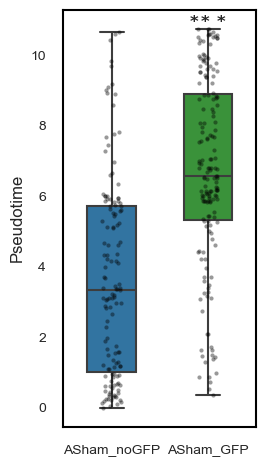

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ranksums
import pandas as pd

# --- Prepare data ---
plot_df = df[df["Sample"].isin(["ASham_noGFP", "ASham_GFP"])].copy()
plot_df["Sample"] = pd.Categorical(plot_df["Sample"], categories=["ASham_noGFP", "ASham_GFP"], ordered=True)

# --- Statistical test ---
noGFP = plot_df[plot_df["Sample"] == "ASham_noGFP"]["Pseudotime"].dropna()
GFP = plot_df[plot_df["Sample"] == "ASham_GFP"]["Pseudotime"].dropna()
stat, p_value = ranksums(GFP, noGFP)

# --- Significance marker ---
if p_value < 0.001:
    significance = r'$\bf{***}$'
elif p_value < 0.01:
    significance = r'$\bf{**}$'
elif p_value < 0.05:
    significance = r'$\bf{*}$'
else:
    significance = "n.s."

# --- Plot ---
sns.set(style="white", context="talk")

# Reduce the figure size (half of current size)
fig, ax = plt.subplots(figsize=(3, 5))

# Boxplot
sns.boxplot(data=plot_df, x="Sample", y="Pseudotime",
            palette={"ASham_noGFP": "#1f77b4", "ASham_GFP": "#2ca02c"},
            order=["ASham_noGFP", "ASham_GFP"],
            linewidth=1.5, width=0.5, showcaps=True, showfliers=False, ax=ax)

# Jittered points
sns.stripplot(data=plot_df, x="Sample", y="Pseudotime",
              order=["ASham_noGFP", "ASham_GFP"],
              color="black", alpha=0.4, jitter=True, size=3, ax=ax)

# Calculate the y position for the stars above the box
box_top = plot_df.groupby("Sample")["Pseudotime"].max()
y_max_star = box_top.max() + 0.02  # Slightly above the max value

# Place significance above second box
ax.text(1, y_max_star, significance, ha='center', va='bottom', fontsize=12, fontweight='bold')

# Axis styling
ax.set_xlabel("")
ax.set_ylabel("Pseudotime", fontsize=12)

# Black border around axis
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(1.5)
    spine.set_color('black')

# Adjust label size to match
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)

plt.tight_layout()
plt.savefig("Pseudotime_Boxplot_SignificanceOnly_HalfSizeRAPC.png", dpi=300)
plt.show()


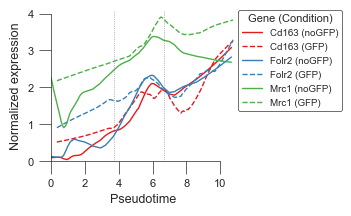

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.nonparametric.smoothers_lowess import lowess
from scipy.stats import ttest_ind

# Load data
umap_df = pd.read_csv("pseudotime_metadata_for_python.csv", index_col=0)
expr_matrix = pd.read_csv("normalized_expr_matrix_for_python.csv", index_col=0)
genes = ["Cd163", "Folr2", "Mrc1"]

# Get expression values
def get_expr(gene):
    if gene in expr_matrix.index:
        return expr_matrix.loc[gene].values
    else:
        raise ValueError(f"Gene {gene} not found in the expression matrix.")

pseudotime = umap_df["Pseudotime"]
early_max, mid_max = np.quantile(pseudotime, [1/3, 2/3])

# Assign bins
def assign_bin(pt):
    if pt <= early_max:
        return "early"
    elif pt <= mid_max:
        return "mid"
    else:
        return "late"
umap_df["bin"] = pseudotime.apply(assign_bin)

# Build dataframe for plotting and testing
records = []
for gene in genes:
    expr = get_expr(gene)
    for cond in ["ASham_noGFP", "ASham_GFP"]:
        mask = umap_df["Sample"] == cond
        for i, pt in enumerate(pseudotime[mask]):
            records.append({
                "gene": gene,
                "expression": expr[mask.values][i],
                "pseudotime": pt,
                "condition": cond,
                "bin": assign_bin(pt)
            })
df = pd.DataFrame(records)

# Statistical testing per gene per bin
results = []
for gene in genes:
    for b in ["early", "mid", "late"]:
        group = df[(df["gene"] == gene) & (df["bin"] == b)]
        gfp = group[group["condition"] == "ASham_GFP"]["expression"]
        nogfp = group[group["condition"] == "ASham_noGFP"]["expression"]
        if len(gfp) > 1 and len(nogfp) > 1:
            stat, pval = ttest_ind(gfp, nogfp, equal_var=False)  # Welch's t-test
        else:
            pval = np.nan
        results.append({"gene": gene, "bin": b, "p_value": pval})
pval_df = pd.DataFrame(results)
pval_df.to_csv("pseudotime_binwise_pvalues.csv", index=False)

# Plotting
import matplotlib.ticker as ticker

# Plotting
# Plotting
plt.figure(figsize=(5, 2.5))
ax = plt.gca()

palette = sns.color_palette("Set1", len(genes))
gene_colors = {gene: c for gene, c in zip(genes, palette)}

for gene in genes:
    df_gene = df[df["gene"] == gene]
    color = gene_colors[gene]
    for cond in ["ASham_noGFP", "ASham_GFP"]:
        sub = df_gene[df_gene["condition"] == cond]
        sm = lowess(sub["expression"], sub["pseudotime"], frac=0.3)
        linestyle = "-" if cond == "ASham_noGFP" else "--"
        label = f"{gene} ({'noGFP' if cond=='ASham_noGFP' else 'GFP'})"
        ax.plot(sm[:, 0], sm[:, 1], color=color, linestyle=linestyle, linewidth=1, label=label)

# Bin lines
ax.axvline(early_max, color="gray", linestyle=":", linewidth=0.5)
ax.axvline(mid_max, color="gray", linestyle=":", linewidth=0.5)

# Axis settings
ax.set_xlabel("Pseudotime", fontsize=9)
ax.set_ylabel("Normalized expression", fontsize=9)

# Move spines to (0,0)
ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Adjust spine line thickness (default is 1, here it is set to 0.5 for thinner lines)
ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Adjust tick line width (make them thinner)
ax.tick_params(axis='both', which='major', width=0.5)  # Set tick lines to thinner width
ax.tick_params(axis='both', which='minor', width=0.5)  # If you have minor ticks, you can adjust them too


# Adjust limits
x_min, x_max = pseudotime.min(), pseudotime.max()
ax.set_xlim(left=max(0, x_min - 0.1), right=x_max + 0.1)
y_min = df["expression"].min()
ax.set_ylim(bottom=max(0, y_min - 0.1))

# Set x-axis ticks to whole numbers
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

# Legend as colored boxes
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
legend = ax.legend(
    by_label.values(),
    by_label.keys(),
    fontsize=7,
    title="Gene (Condition)",
    title_fontsize=8,
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    frameon=True,
    borderaxespad=0.
)
legend.get_frame().set_edgecolor('black')
legend.get_frame().set_linewidth(0.5)

# Adjust font size for ticks
ax.tick_params(axis='both', which='major', labelsize=8)  # Reduce tick font size

sns.despine(trim=True)
plt.tight_layout(rect=[0, 0, 0.78, 1])
plt.savefig("Pseudotime_gene_exp_with_pvals.png", dpi=300)
plt.show()


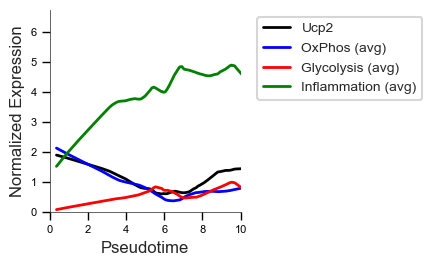

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess
import seaborn as sns
import os

# Set working directory
os.chdir("P:/Tolulope/Manuscript/Yuan Analysis/SLING M2")

# Load data
pseudotime_df = pd.read_csv("cluster_pseudotime_for_python.csv")
expression_matrix = pd.read_csv("normalized_expr_matrix_for_python.csv", index_col=0)
cell_metadata = pd.read_csv("cell_metadata_for_python.csv", index_col=0)

# Step 1: Add cell barcodes to pseudotime_df
pseudotime_df["Cell"] = cell_metadata.index[:len(pseudotime_df)]
pseudotime_df.set_index("Cell", inplace=True)

# Step 2: Merge pseudotime and metadata
df = pd.merge(pseudotime_df, cell_metadata, left_index=True, right_index=True)
df.rename(columns={'Sample_x': 'Sample_pseudotime', 'Sample_y': 'Sample_metadata'}, inplace=True)

# Step 3: Filter for specific condition
condition = "ASham_GFP"
df_condition = df[df["Sample_metadata"] == condition]

if df_condition.empty:
    print("No data found for the specified condition.")
else:
    # Extract expression matrix for the specific condition
    expr_of_interest = expression_matrix.loc[:, df_condition.index]

    # Define the genes of interest
    oxphos_genes = ["Atp5f1e", "Atp5if1", "Cox6c", "Ndufa13"]
    glycolysis_genes = ["Hk2", "Pfkfb3"]
    target_gene = "Ucp2"
    inflammation_genes = ["Cxcl2", "Ccl2", "Ccl8", "Ccl7"]

    # Combine all genes
    all_genes_of_interest = oxphos_genes + glycolysis_genes + [target_gene] + inflammation_genes

    # Extract the gene expressions
    ucp2_expr = expr_of_interest.loc[target_gene]
    oxphos_expr = expr_of_interest.loc[oxphos_genes].mean(axis=0)
    glycolysis_expr = expr_of_interest.loc[glycolysis_genes].mean(axis=0)
    inflammation_expr = expr_of_interest.loc[inflammation_genes].mean(axis=0)
    pseudotime = df_condition["Pseudotime"]

    # Set up the plot
    fig, ax = plt.subplots(figsize=(6, 3))  # Adjust size for publication quality
    colors = {
        "Ucp2": "black", 
        "OxPhos": "blue", 
        "Glycolysis": "red", 
        "Inflammation": "green"
    }

    # Smooth the expression data using LOWESS
    ucp2_smooth = lowess(ucp2_expr, pseudotime, frac=0.3)
    oxphos_smooth = lowess(oxphos_expr, pseudotime, frac=0.3)
    glyco_smooth = lowess(glycolysis_expr, pseudotime, frac=0.3)
    inflammation_smooth = lowess(inflammation_expr, pseudotime, frac=0.3)

    # Plot the smoothed expressions
    ax.plot(ucp2_smooth[:, 0], ucp2_smooth[:, 1], label="Ucp2", color=colors["Ucp2"], linewidth=2)
    ax.plot(oxphos_smooth[:, 0], oxphos_smooth[:, 1], label="OxPhos (avg)", color=colors["OxPhos"], linewidth=2)
    ax.plot(glyco_smooth[:, 0], glyco_smooth[:, 1], label="Glycolysis (avg)", color=colors["Glycolysis"], linewidth=2)
    ax.plot(inflammation_smooth[:, 0], inflammation_smooth[:, 1], label="Inflammation (avg)", color=colors["Inflammation"], linewidth=2)

    # Customize axis labels
    ax.set_xlabel("Pseudotime", fontsize=12)
    ax.set_ylabel("Normalized Expression", fontsize=12)

    # Set axis limits (ensure zero is visible if using 'zero' spine position)
    x_min, x_max = 0, 10
    y_min = min(ucp2_expr.min(), oxphos_expr.min(), glycolysis_expr.min(), inflammation_expr.min(), 0)
    y_max = max(ucp2_expr.max(), oxphos_expr.max(), glycolysis_expr.max(), inflammation_expr.max())

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

    # Set spine aesthetics (no inward bend)
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_linewidth(0.5)
    ax.spines['bottom'].set_linewidth(0.5)
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

    # Tick placement and style
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.tick_params(axis='both', which='both', direction='out', length=6, width=1.0, colors='black')
    ax.tick_params(axis='both', which='major', labelsize=8)

    # Legend
    ax.legend(fontsize=10, title_fontsize=11, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.5)

    # Clean up plot
    sns.despine()  # Ensures top and right spines are removed
    plt.tight_layout(rect=[0, 0, 0.8, 1])

    # Save and show
    plt.savefig("pseudotime_gene_expression_with_inflammation_plot_no_grid.png", dpi=300)
    plt.show()
